
      1.  age
      2.  sex (1=male,2=female)
      3.  chest pain type (4 values)
      4.  resting blood pressure (in mm Hg on admission to the hospital
      5.  serum cholestoral in mg/dl
      6.  fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
      7.  resting electrocardiographic results (values 0,1,2)
      8.  maximum heart rate achieved
      9.  exercise induced angina (1 = yes; 0 = no)
      10. oldpeak = ST depression induced by exercise relative to rest
      11. the slope of the peak exercise ST segment
      12. number of major vessels (0-3) colored by flourosopy
      13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
        

uvoz nabora podatkov


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Heart.csv',index_col=0)

df1 = df.copy()

print prvih 6 vrstic

In [ ]:
df.head(6)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,No


najpogostejša starost v tem nizu podatkov

In [ ]:
df['Age'].value_counts().idxmax()

58

oblika nabora podatkov, koliko vrstic in stolpcev ima

In [ ]:
df.shape

(303, 14)

Pregled s katerimi vrstami podatkov bomo delali


In [ ]:
df.dtypes

Age            int64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD           object
dtype: object

Izrišimo graf korelacij vseh številskih spremenljivk.


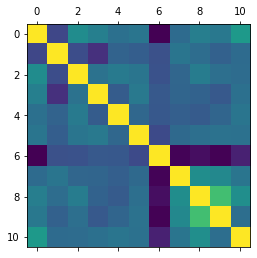

In [ ]:
import matplotlib.pyplot as plt
plt.matshow(df.corr())
plt.show()


1=moški 0= *ženski*
graf koliko ljudi ima srčno bolezen

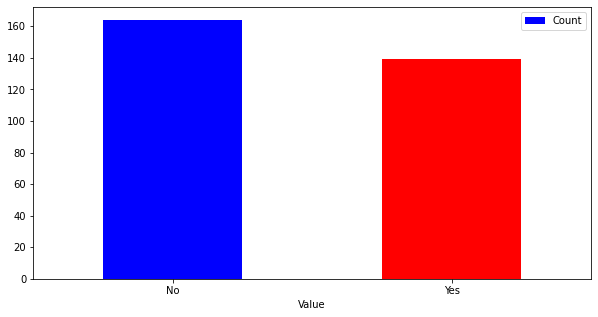

In [ ]:
asd =df.AHD.value_counts()
bd = dict(asd)
zxc=pd.DataFrame(bd.items(), columns=['Value', 'Count'])
zxc.plot.bar(x="Value", y="Count", rot=0,figsize=(10, 5),color=['blue','red'])

graf, koliko ljudi je dobilo srčno bolezen glede na spol
1=moški 0= ženski

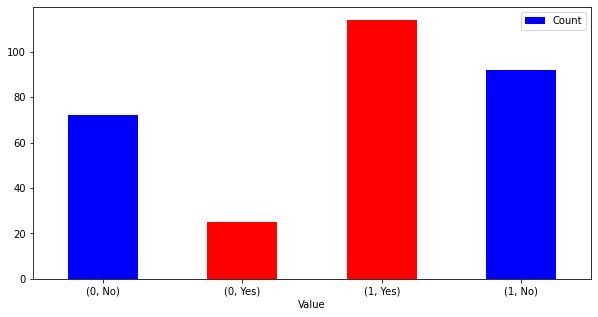

In [ ]:
asd=df.groupby('Sex')['AHD'].value_counts()
bd = dict(asd)
zxc=pd.DataFrame(bd.items(), columns=['Value', 'Count'])
zxc.plot.bar(x="Value", y="Count", rot=0,figsize=(10, 5),color=['blue','red','red'])

graf, koliko ljudi je dobilo srčno bolezen zaradi bolečine v prsih

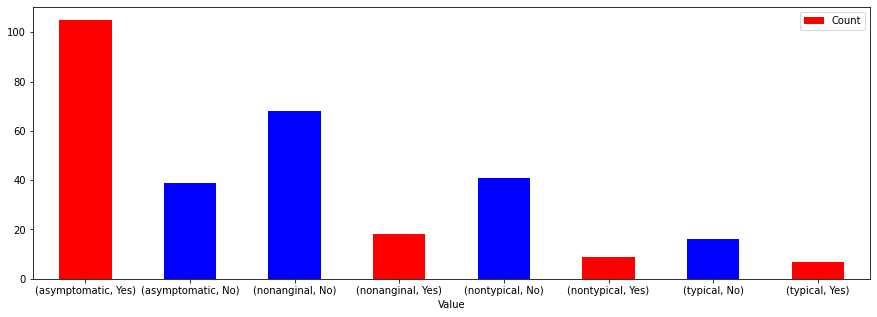

In [ ]:
asd=df.groupby('ChestPain')['AHD'].value_counts()
bd = dict(asd)
zxc=pd.DataFrame(bd.items(), columns=['Value', 'Count'])
zxc.plot.bar(x="Value", y="Count", rot=0,figsize=(15, 5),color=['red','blue','blue','red','blue','red','blue','red'])


najnižja starost, ko ima človek srčno bolezen, in najvišja starost, ko ima človek srčno bolezen

In [ ]:
asd=df.copy()
asd=df.loc[df['AHD'] == "Yes"]
maxAge=max(asd.Age)
minAge=min(asd.Age)
print(maxAge)
print(minAge)


77
35



preveri, ali sta bp in holesterol povezana

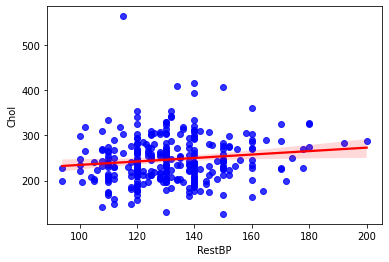

In [ ]:
import matplotlib.colors as colors
import seaborn as sns

ax = sns.regplot(x='RestBP', y='Chol',data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

koliko manjkajočih vrednosti ima ta nabor podatkov

In [ ]:
df.isna().sum()


Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

Dodajanje vrednosti pri manjkajočih vrednostih s strategijo mean in most_frequent

Če je mean, nadomestite manjkajoče vrednosti s povprečjem v vsakem stolpcu. Lahko se uporablja samo s številskimi podatki.

Če je »most_frequent«, nadomestite manjkajoče z najpogostejšo vrednostjo v vsakem stolpcu. Lahko se uporablja z nizi ali številskimi podatki. Če obstaja več kot ena takšna vrednost, se vrne samo najmanjša.

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(df.iloc[1:, 11:12])
df.iloc[1:, 11:12] = imputer.transform(df.iloc[1:, 11:12])

imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',verbose=0)
imputer = imputer.fit(df.iloc[1:, 12:13])
df.iloc[1:, 12:13] = imputer.transform(df.iloc[1:, 12:13])

print(df.isna().sum())

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
AHD          0
dtype: int64


izdelava tortnega diagrama po vrednostih doseženega maksimalnega srčnega utripa in razvrščanje v skupine

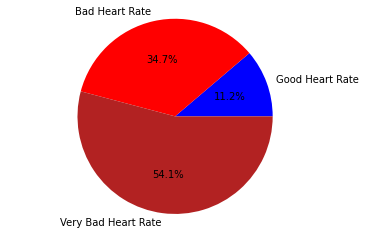

In [ ]:
df_good_hr = df[df['MaxHR'] < 120]
df_bad_hr = df[(df['MaxHR'] >= 120) & (df['MaxHR'] <= 150)]
df_very_bad_hr = df[df['MaxHR'] > 150]

# Count the number of occurrences in each group
good_hr_count = len(df_good_hr)
bad_hr_count = len(df_bad_hr)
very_bad_hr_count = len(df_very_bad_hr)

# Create the pie chart
labels = ['Good Heart Rate', 'Bad Heart Rate', 'Very Bad Heart Rate']
sizes = [good_hr_count, bad_hr_count, very_bad_hr_count]

plt.pie(sizes, labels=labels, autopct='%1.1f%%' ,colors=['blue', 'red', 'firebrick'])
plt.axis('equal')
plt.show()

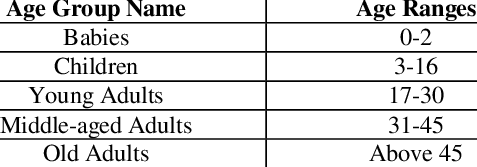

ker imamo v tem naboru podatkov ogromno starostno razliko, sem iskal po internetu in nabor podatkov razdelil na to starost Babies,Children,YoungAdults,MiddleAdults and OldAdults

In [ ]:
counter = (len(df.Age))
print(counter)
for i in range  (counter):
  if df.Age[i+1]<2:
      df.Age[i+1]="Babies"
  elif df.Age[i+1]>=3 and(df.Age[i+1]<=16):
      df.Age[i+1]="Children"
  elif df.Age[i+1]>=17 and(df.Age[i+1]<=30):
      df.Age[i+1]="YoungAdults"
  elif df.Age[i+1]>=31 and(df.Age[i+1]<=55):
      df.Age[i+1]="MiddleAdults"
  else:
      df.Age[i+1]="OldAdults"

df.to_csv('asdd.csv')

303


<ipython-input-15-e2fb63099905>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Age[i+1]="OldAdults"
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


izbrišimo graf, ki prikazuje najvišji srčni utrip glede na starost človeka in če je imel srčno bolezen ali ne

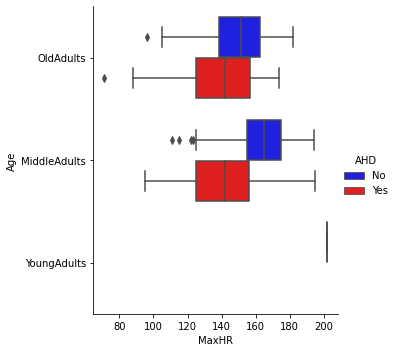

In [ ]:
import seaborn as sns
g = sns.catplot(data=df, y='Age', x='MaxHR', hue='AHD', kind='box', palette=['blue', 'red'])





Iskal sem po spletu in našel to, da je zdrav holesterol v serumu manj kot 200 mg/dL, zato sem za to naredil pie diagram in toliko ljudi ima slab holesterol

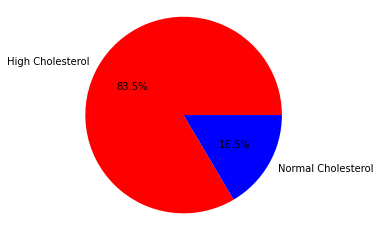

In [ ]:
df_high_chol = df[df['Chol'] > 200]
df_low_chol = df[df['Chol'] <= 200]

high_chol_count = len(df_high_chol)
low_chol_count = len(df_low_chol)

labels = ['High Cholesterol', 'Normal Cholesterol']
sizes = [high_chol_count, low_chol_count]
colors = ['red', 'blue']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',colors=colors)
plt.axis('equal')
plt.show()

pretvorba podatke v dummy variable


In [ ]:
from sklearn.preprocessing import StandardScaler

df2 = df.copy(deep=True)

dummies = []
cols = ['Age','ChestPain','Thal']
for col in cols:
   df2 = pd.get_dummies(df2, columns = [col])

scaler=StandardScaler()
scaledColumns=['MaxHR','RestBP','Chol','Oldpeak']
df2[scaledColumns]=scaler.fit_transform(df2[scaledColumns])
df2.head()



,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,...,Age_MiddleAdults,Age_OldAdults,Age_YoungAdults,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,...,0,1,0,0,0,0,1,1,0,0
2,1,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,...,0,1,0,1,0,0,0,0,1,0
3,1,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,...,0,1,0,1,0,0,0,0,0,1
4,1,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,...,1,0,0,0,1,0,0,0,1,0
5,0,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,...,1,0,0,0,0,1,0,0,1,0


usposabljanje nabora podatkov

In [ ]:

from sklearn.model_selection import train_test_split

izhod = 'AHD'

df_izhod2 = df2[izhod]
df_vhod2 = df2.drop(izhod, axis=1)

x_train, x_test, y_train, y_test = train_test_split(df_vhod2, df_izhod2, test_size=0.30, random_state=789)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(212, 20) (91, 20) (212,) (91,)


imamo decision three classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

lm = DecisionTreeClassifier()
lm.fit(x_train, y_train)
lm_rezultat = lm.predict(x_test) #
lm_rezultat[:4]

array(['Yes', 'No', 'Yes', 'Yes'], dtype=object)

izpis tocnost,preciznost,preklic in f1 score

In [ ]:
from sklearn import metrics

print('Precision',metrics.accuracy_score(lm_rezultat, y_test)) # Izpišemo točnost klasifikacije algoritma
print('Recall:', metrics.recall_score(lm_rezultat, y_test, average='micro')) # Za vsak razred izpiše recall
print('F1-score:', metrics.f1_score(lm_rezultat, y_test, average='micro'))
print('Accuracy',metrics.accuracy_score(lm_rezultat, y_test))


Precision 0.7802197802197802
Recall: 0.7802197802197802
F1-score: 0.7802197802197802
Accuracy 0.7802197802197802


Z uporabo osemrezinskega navzkrižnega preverjanja z optimizacijo metrike natančnosti uporabljam vse te naslednje klasifikatorje:

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

klasifikatorji = [] # Seznam kalsifikatorjev
klasifikatorji.append(DecisionTreeClassifier())
klasifikatorji.append(LogisticRegression())
klasifikatorji.append(KNeighborsClassifier())
klasifikatorji.append(svm.SVC())
klasifikatorji.append(GaussianNB())
klasifikatorji.append(RandomForestClassifier())
klasifikatorji.append(ExtraTreesClassifier())
klasifikatorji.append(AdaBoostClassifier())
klasifikatorji.append(GradientBoostingClassifier())

df_ml =df2.copy(deep=True)
df_ml.head()

izhod = 'AHD'
vhod = df_ml.drop(izhod, axis=1)

rezultatArray = []
typeArray = []
for klasifikator in klasifikatorji:
    kfold = StratifiedKFold(n_splits=4, random_state=123, shuffle=True) # Stratified KFold za preverjanje z desetimi rezi
    cv_rezultati = cross_val_score(klasifikator, # Model klasifikatorja
                                   vhod, # Vhodni input podatki
                                   df_ml[izhod], # Kaj je rezultat (razred)
                                   cv=kfold, # Število rezov
                                   scoring='accuracy') # Metrika ocenjevanja
    rezultatArray.append(cv_rezultati.mean())
    typeArray.append(type(klasifikator).__name__ )

    print(f'{type(klasifikator).__name__ :}: {cv_rezultati.mean():1.4f}')
zaGraf = pd.DataFrame(
    {'Type': typeArray,
     'Rezultat': rezultatArray,
    })



DecisionTreeClassifier: 0.6966
LogisticRegression: 0.8384
KNeighborsClassifier: 0.8053
SVC: 0.8184
GaussianNB: 0.7227
RandomForestClassifier: 0.8218
ExtraTreesClassifier: 0.8218
AdaBoostClassifier: 0.8087
GradientBoostingClassifier: 0.7788


rezultati klasifikacije v graf

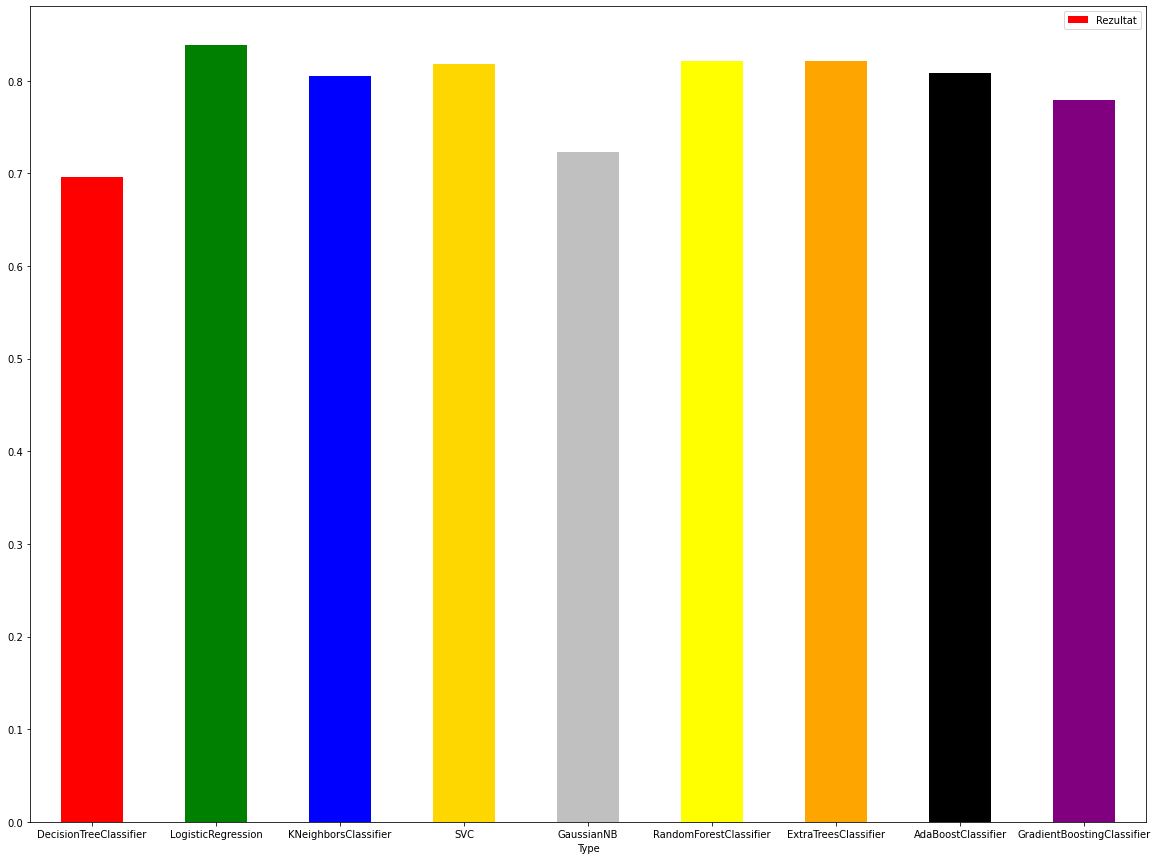

In [ ]:
colors = ['red','green','blue','gold','silver','yellow','orange','black','purple']
ax = zaGraf.plot.bar(x='Type', y='Rezultat', rot=0,figsize=(20, 15),color=colors)

GRUČENJE

Iz dataframe odsranimo vse kategorične podatke ker ne potrebujemo, ampak številske podatke standardiziramo za nadaljno analizo ker bomo potrebujali samo številske podatke


In [ ]:
from sklearn.preprocessing import StandardScaler

kategoricni = list(df1.select_dtypes([np.object]).columns)
stevilski=list(df1.select_dtypes([np.number]).columns)

df_2= df1.drop(kategoricni, axis=1)

df_2[stevilski] = StandardScaler().fit_transform(df_2[stevilski])
df_2.head()
df_2['Ca'].fillna(df_2['Ca'].mean(), inplace=True)

<ipython-input-24-e9472f5897fd>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kategoricni = list(df1.select_dtypes([np.object]).columns)


Da dobimo vpogled koliko gruč bomo optimalno delitit naredimo hierarhično gručenje

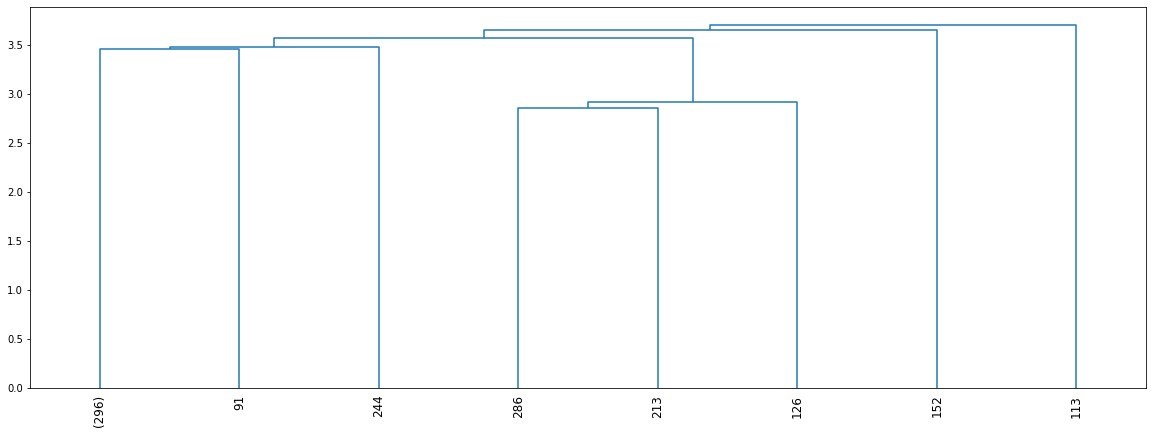

In [ ]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

linked = linkage(df_2, method='single')

najnizji_nivo = 4

plt.figure(figsize=(20,7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           p=najnizji_nivo,
           truncate_mode='level',
           leaf_rotation=90)

plt.show()


Izvedite gručenje z uporabo K-means algoritma.

Algoritem naj razdeli instance v 4 gruči. Izpišite koliko je instanc v posamezni gruč

In [ ]:
from sklearn.cluster import KMeans
import collections

number = 2
kmeans = KMeans(n_clusters=number, random_state=0).fit(df_2)

print(f'Gruče v katerem spadajo vse instance:: {kmeans.labels_}')


Gruče v katerem spadajo vse instance:: [1 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0
 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0
 1 1 0 1 1 0 0]


Naredimo analizo koliko je optimalno število gruč pri uporabi K-means algoritma.

Text(0.5, 0, 'Število gruč')

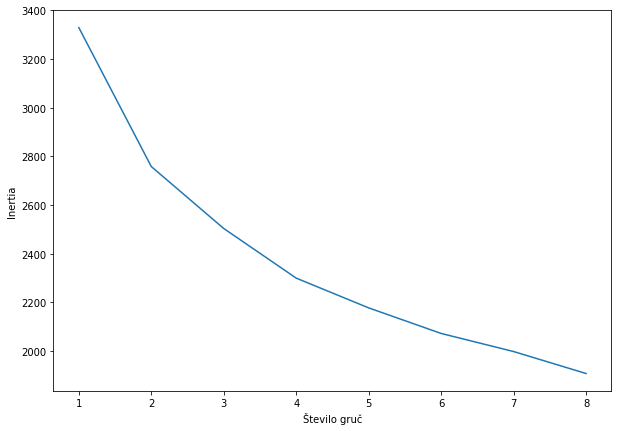

In [ ]:

import seaborn as sns

inertia = {}

for k in range(1, 9):
  kmeans = KMeans(n_clusters=k).fit(df_2)
  inertia[k] = kmeans.inertia_
inertia

plt.figure(figsize=(10,7))
sns.lineplot(x=list(inertia.keys()), y=list(inertia.values()))
plt.ylabel('Inertia')
plt.xlabel('Število gruč')

S pomočjo PCA transformacije naredimo dva nova stolpca. Vrednosti iz teh dveh stolpcev prikažimo v grafu raztrosa.
Instance so  obarvane glede na to, v katero gručo jih je razvrstil K-means algoritem.

Inertia za gručenje v štiri gruče: 2758.0242238152086


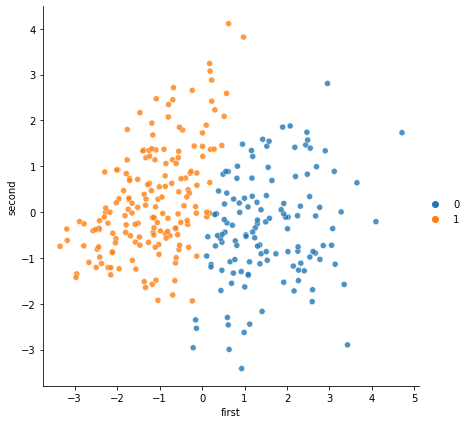

In [ ]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import TSNE


df_transformed = PCA(n_components=2).fit_transform(df_2)
kmeans = KMeans(n_clusters=2).fit(df_2)
print(f'Inertia za gručenje v štiri gruče: {kmeans.inertia_}')

df_transformed = pd.DataFrame(df_transformed, columns=('first', 'second'))

sns.relplot(x='first', y='second', hue=kmeans.labels_, alpha=.8, height=6, data=df_transformed)

 Nad transformiranimi podatki  (z algoritmom PCA) izvedmo gručenje z  Birch, SpectralClustering


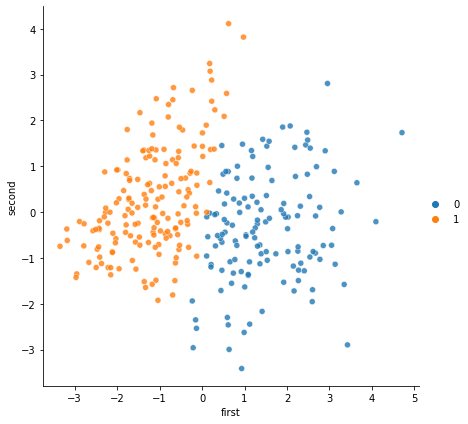

In [ ]:
from sklearn.cluster import SpectralClustering
import numpy as np

clustering = SpectralClustering(n_clusters=2,
         assign_labels='discretize',
         random_state=0).fit(df_transformed)

clustering.labels_

sns.relplot(x="first", y="second", hue=clustering.labels_, alpha=.8, height=6, data=df_transformed)


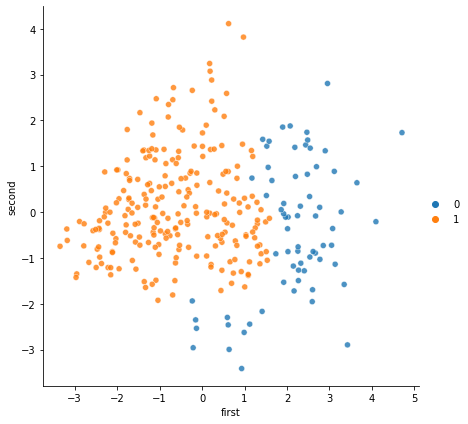

In [ ]:
from sklearn.cluster import Birch

brc = Birch(n_clusters=2)
brc.fit(df_transformed)

sns.relplot(x="first", y="second", hue=brc.labels_, alpha=.8, height=6, data=df_transformed)